In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# 1 Pick a dataset.
I want to choose all of the [Stack Overflow Survey - Multiple Years](https://insights.stackoverflow.com/survey) results in this project.  
I choose the year of the survey results as the file name and save them in the floder called 'data'.

In [2]:
from showCharts import render_echarts

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display

from copy import deepcopy

import matplotlib.pyplot as plt 
import matplotlib 
matplotlib.style.use('ggplot')

# dict for original data
org_datas = {}
for year in range(2011,2019,1):
    if year in [2016,2017]:
        org_datas[year] = pd.read_csv('data/%s.csv' %year, encoding = 'ISO-8859-1',low_memory=False)
    elif year == 2018:
        org_datas[year] = pd.read_excel('data/%s.xlsx' %year, encoding = 'ISO-8859-1')
    elif year == 2015:
        org_datas[year] = pd.read_csv('data/%s.csv' %year, encoding = 'ISO-8859-1',header=[1],low_memory=False)
    else:
        org_datas[year] = pd.read_csv('data/%s.csv' %year, encoding = 'ISO-8859-1',header=[0,1],low_memory=False)
    print("data in %4d has %6d rows,%3d columns" %(year,org_datas[year].shape[0],org_datas[year].shape[1]))

data in 2011 has   2813 rows, 65 columns
data in 2012 has   6243 rows, 75 columns
data in 2013 has   9742 rows,128 columns
data in 2014 has   7643 rows,120 columns
data in 2015 has  26086 rows,222 columns
data in 2016 has  56030 rows, 66 columns
data in 2017 has  51392 rows,154 columns
data in 2018 has  98855 rows,129 columns


# 2  Pose at least three questions related to business or real-world applications of how the data could be used.

- 1.Which languages were most popular in each year?  
- 2.Which occupations were most popular in each year?  
- 3.What is the average IT experience of programmers in different countries each year?  
- 4.What is the average age of programmers in different countries each year?  
- 5.What is the average salary of the participants in different countries each year?  
- 6.What is the average salary of the participants in different countries each year?  

# 3 Prepare data 

In [4]:
#change data_column_names 
def change_column_name(df):
    '''change the name of df's columns
    
    Parameters:
    --------------------
    df:pd.DataFrame
        df which needs to change columns
        
    Returns:
    -------------------------------
    pd.DataFrame
        df after changed
        
    '''
    new_columns = []
    for index,tuple_value in enumerate(list(df.columns)):
        if index >= 1:
            if "Unnamed" in tuple_value[0]:
                tuple_value = (new_columns[index-1][0],tuple_value[1])
        new_columns.append(tuple_value)
    df.columns = pd.MultiIndex.from_tuples(new_columns)
    return df

def change_multiindex_to_simpleindex(df):
    '''change multi index to simple index'''
    df.columns = ['-'.join(i) if type(i) == tuple else i for i in list(df.columns)]

for i in [2011,2012,2013,2014]:
    org_datas[i] = change_column_name(org_datas[i])
    
print("successed to change the column's names of dfs")

successed to change the column's names of dfs


## 3.1 Gather necessary data to answer your questions
 
**select the following columns in which I am interested **
- Country
- age
- IT/Programming experience
- industry
- size of company
- occupation
- languages
- salary

**merge all of the annual datas**

In [5]:
from merge_data import merge_annual_datas
all_years_data = merge_annual_datas(org_datas)

********************2011********************
select country,age,IT_experience,industry,company_size,occupation,languages,salary from data in 2011 year
----------------------------------------
indexes of above columns is [0, 2, 3, 4, 5, 6, 65, 45]
----------------------------------------
show df after selected columns:
----------------------------------------
        country    age IT_experience           industry  \
0        Africa   < 20            <2         Consulting   
1  Other Europe  25-29         41310  Software Products   

                     company_size                 occupation   languages  \
0                 Start Up (1-25)  Web Application Developer  JavaScript   
1  Mature Small Business (25-100)          Server Programmer  Java;SQL;C   

                 salary  
0  Student / Unemployed  
1                   NaN  
********************2012********************
select country,age,IT_experience,industry,company_size,occupation,languages,salary from data in 2012 year
---

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Now take a look at the summary statistics associated with the quantitative variables in your dataset.

In [6]:
all_years_data.describe()

,index,year
count,258804.000000,258804.000000
mean,31748.427791,2016.538890
std,25740.857622,1.628328
min,0.000000,2011.000000
25%,9600.000000,2016.000000
50%,25740.000000,2017.000000
75%,47191.250000,2018.000000
max,98854.000000,2018.000000


## 3.2 Data Process  
Handle categorical columns and missing data
- show the data types of all the df's columns

In [7]:
handle_df = deepcopy(all_years_data)
handle_df.dtypes

index             int64
IT_experience    object
age              object
company_size     object
country          object
industry         object
languages        object
occupation       object
salary           object
year              int64
dtype: object

In addition to 'year' column, all other columns need to be handled

### 3.2.1 Handle categorica

- 1.See all of the values in column **'country'** and modify them.

In [8]:
handle_df.country.value_counts()

United States                     52176
India                             27822
United Kingdom                    20151
Germany                           17878
Canada                             9778
France                             7339
Poland                             6347
United States of America           6003
Russian Federation                 5811
Australia                          5391
Netherlands                        5050
Brazil                             4760
Italy                              4380
Spain                              4361
Sweden                             3742
Other Europe                       3245
Ukraine                            2728
Switzerland                        2655
Romania                            2544
Israel                             2326
Austria                            2113
Turkey                             2100
Belgium                            2015
Pakistan                           2010
China                              1903


Some countries are repeated,such as 'United States' and 'United States of America'. 

In [9]:
handle_df.loc[handle_df.country == 'United States',['country']] = "United States of America"

- 2.See all of the values in column **'IT/Programming experience'** and modify them.

In [10]:
handle_df['IT_experience'].value_counts()

0-2 years           23421
3-5 years           21362
3.5                 15897
13.0                13117
8.0                 11505
6-8 years           11385
2 - 5 years          8037
11                   7800
9-11 years           7573
1.5                  6119
11+ years            6001
6 - 10 years         5769
1 to 2 years         5289
2 to 3 years         4767
12-14 years          4287
3 to 4 years         4003
4 to 5 years         3405
1 - 2 years          3373
20 or more years     3067
Less than a year     3034
15-17 years          3012
5 to 6 years         2990
<2                   2919
2/5/2013             2892
0.5                  2882
18-20 years          2830
6/10/2013            2506
2/5/2014             2405
9 to 10 years        1956
40944                1934
6 to 7 years         1912
6/10/2014            1817
10 to 11 years       1678
41070                1663
Less than 1 year     1647
7 to 8 years         1638
21-23 years          1368
30 or more years     1302
8 to 9 years

Some values like '41070','40944','41435','41310' are hard for me to understand their means.So I decide to mark them as 'nan'  
Some values like ''6/10/2013',I guess its mean is 'the programmer had IT experience of 6-10 years in 2013'

In [11]:
def handle_IT(handle_df):
    '''handle the "IT_experience" of the input df'''
    handle_df.loc[handle_df['IT_experience'].isin(['41070','40944','41435','41310']),['IT_experience']]=np.NaN
    handle_df.loc[handle_df['IT_experience'] == '6/10/2013' ,['IT_experience']]='6-10'
    handle_df.loc[handle_df['IT_experience'] == '2/5/2013' ,['IT_experience']]='2-5'
    handle_df.loc[handle_df['IT_experience'] == '2/5/2014' ,['IT_experience']]='2-5'
    handle_df.loc[handle_df['IT_experience'] == '6/10/2014' ,['IT_experience']]='6-10'
    handle_df.loc[handle_df['IT_experience'] == 'Less than a year' ,['IT_experience']]='1'
    handle_df['IT_experience'] = handle_df['IT_experience'].map(lambda x:str(x).replace(" to ",'-'))
    return handle_df
handle_df = handle_IT(handle_df)

**change the type of the column to 'int':**  
If the format of the value contains "<", ">","older" or "under", retain the number only.  
If the format of the value is  range of age,change it to the midpoint of the age range.

In [12]:
#Pandas DataFrame dropna() function is used to remove Null/NaN/NaT values.
def process_data_range(df,feature,dropna=True):
    '''transform the column's values whose formats are number range into a number
    
    Parameters:
    --------------------
    df: pd.DataFrame
        df which needs to be handled
    feature: string
        column which needs to be handled
    dropna: boolean 
        whether to dropna
        
    Returns:
    -----------------------
    pd.DataFrame: df after processed
    
    '''
    
    from copy import deepcopy
    
    df = deepcopy(df)
    # remove vocabulary ,"<",">"
    remove = lambda x: "".join([i for i in str(x) if i in ["0","1","2","3","4","5","6","7","8","9","-",'.']])
    df[feature] = df[feature].map(remove)


    # if age range ,change it to the midpoint
    # for na value,I mark them as 'NaN'
    change_to_midpoint = lambda x: np.average([float(i) for i in x.split("-")]) if "-" in x else np.NaN if x == "" else float(x)
    df[feature] = df[feature].map(change_to_midpoint)

    if dropna:
        # remove ""
        df = df[df[feature] != -1]

    if feature in df.select_dtypes(include=['float','int']).columns:
        print("successed to modify the column '%s'." %feature)
    else:
        print("failed to modify the column '%s'." %feature)
    return df
handle_df = process_data_range(handle_df,'IT_experience',dropna=False)

successed to modify the column 'IT_experience'.


3.See all of the values in column **'occupation'** and modify them.

In [13]:
display(handle_df['occupation'].value_counts())

                                                                                                                                                                                                                                                          34255
Full-stack web developer                                                                                                                                                                                                                                  20651
Student                                                                                                                                                                                                                                                   14087
Back-end web developer                                                                                                                                                                                                                  

The value of this column is case sensitive.For example,the word 'Back_end web developer' and the word 'Back_End Web Developer' are the same.To avoid recounting them, I convert all values to lowercase.

In [14]:
handle_df.loc[:,'occupation'] = handle_df['occupation'].map(lambda x:str(x).lower())
handle_df.loc[:,'occupation'] = handle_df['occupation'].map(lambda x:x.replace('-',' '))

4.See all of the values in column **'industry'** and modify them.

In [15]:
handle_df['industry'].value_counts()

Software Products          20592
Web Services                9456
Consulting                  6378
Finance / Banking           6140
Other (please specify)      5290
Internet                    3870
Education                   3647
Healthcare                  3255
Other                       3241
Media / Advertising         2738
Manufacturing               2375
Telecommunications          1982
Retail                      1977
Government                  1964
Gaming                      1825
Consumer Products           1818
Foundation / Non-Profit      949
Student                      857
Automotive                   804
Defense                      604
Aerospace                    560
Not Currently Employed       445
I'm a student                431
Advertising                  418
Name: industry, dtype: int64

The values of this column is normal, I think they do not need to be handled.

5.See all of the values in column **'size of company'** and modify them.

In [16]:
handle_df['company_size'].value_counts()

20 to 99 employees                       25583
100 to 499 employees                     21285
10,000 or more employees                 15437
10 to 19 employees                       12110
1,000 to 4,999 employees                 11465
Fewer than 10 employees                  11286
500 to 999 employees                      7116
5,000 to 9,999 employees                  4621
1/25/2013                                 2706
Start Up (1-25)                           2507
Mature Small Business (25-100)            1702
Fortune 1000 (1,000+)                     1550
Mid Sized (100-999)                       1496
26-100                                    1478
101-999                                   1467
3001                                      1263
Other (not working, consultant, etc.)     1248
I don't know                               869
Student                                    708
I prefer not to answer                     681
1,000-3,000                                476
Name: company

In [17]:
handle_df.loc[handle_df['company_size'].isin(['I prefer not to answer',"I don't know"]),['company_size']]=np.NaN
handle_df.loc[handle_df['company_size'] == 'Fortune 1000 (1,000+)' ,['company_size']]='1000'
handle_df.loc[handle_df['company_size'] == '1/25/2013' ,['company_size']]='1-25'
handle_df.loc[handle_df['company_size'] == '1/5/2014' ,['company_size']]='1-5'
handle_df.loc[handle_df['company_size'] == '6/15/2014' ,['company_size']]='6-15'
# I guess they are likely to be working alone,so I mark them as '1'.
handle_df.loc[handle_df['company_size'].isin(['Student',"Other (not working, consultant, etc.)"]),['company_size']]='1'

handle_df['company_size'] = handle_df['company_size'].map(lambda x:str(x).replace(" to ",'-'))

handle_df = process_data_range(handle_df,'company_size',dropna=False)

successed to modify the column 'company_size'.


In [18]:
handle_df['company_size'].value_counts()

59.5       25583
299.5      21285
10000.0    15437
14.5       12110
2999.5     11465
10.0       11286
749.5       7116
13.0        5213
7499.5      4621
1.0         1956
62.5        1702
1000.0      1550
549.5       1496
63.0        1478
550.0       1467
3001.0      1263
2000.0       476
Name: company_size, dtype: int64

6.See all of the values in column **'age'** and modify them.

In [19]:
handle_df.age.value_counts()
handle_df = process_data_range(handle_df,'age',dropna=False)

successed to modify the column 'age'.


In [20]:
handle_df.age.value_counts()

29.5    31759
27.0    30440
22.0    25353
32.0    19515
21.0    15249
39.5    11477
37.0    10615
20.0     7916
44.5     4905
45.0     4227
49.5     3313
54.5     1640
18.0     1638
55.5     1028
59.5      959
60.0      662
65.0      179
Name: age, dtype: int64

7.See all of the values in column **'salary'** and modify them.

In [21]:
handle_df['salary'].value_counts()
handle_df = process_data_range(handle_df,'salary',dropna=False)
handle_df['salary'].value_counts()

successed to modify the column 'salary'.


5.000000e+03    8129
5.000000e+04    6452
3.000000e+04    6126
7.000000e+04    5677
1.500000e+04    5375
1.000000e+04    4468
9.000000e+04    4369
2.500000e+04    4178
3.500000e+04    4051
4.500000e+04    4034
5.500000e+04    3807
6.500000e+04    3611
7.500000e+04    3331
1.100000e+05    3163
2.000000e+04    3162
8.500000e+04    2450
9.500000e+04    2101
1.050000e+05    2086
1.300000e+05    1867
1.150000e+05    1501
1.250000e+05    1378
1.400000e+05    1301
1.000000e+05    1251
6.000000e+04    1236
0.000000e+00    1161
1.200000e+05    1049
8.000000e+04    1019
1.500000e+05     976
1.350000e+05     922
4.000000e+04     878
                ... 
8.537491e+02       1
1.904000e+03       1
9.069767e+04       1
7.974300e+04       1
2.642913e+04       1
1.928375e+03       1
9.138800e+04       1
1.952000e+03       1
4.933196e+03       1
5.637939e+03       1
5.155879e+02       1
2.840000e+03       1
1.540741e+04       1
4.015484e+04       1
9.926452e+04       1
4.249000e+03       1
1.385496e+04 

In [22]:
handle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258804 entries, 0 to 258803
Data columns (total 10 columns):
index            258804 non-null int64
IT_experience    213479 non-null float64
age              170875 non-null float64
company_size     125504 non-null float64
country          257082 non-null object
industry         81616 non-null object
languages        216511 non-null object
occupation       258804 non-null object
salary           135941 non-null float64
year             258804 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 19.7+ MB


### 3.2.2 drop outliers 

In [23]:
all_years_data_drop_outliers = deepcopy(handle_df)

#### show the hist of 'salary' column

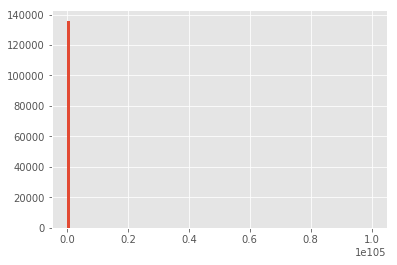

In [24]:
all_years_data_drop_outliers.salary.hist(bins=100)

#### Display 'salary' column in order

In [25]:
all_years_data_drop_outliers.sort_values(by=['salary'],ascending=False).salary.head(20)

238274    1.000000e+105
243144     1.101001e+78
231386     1.000000e+38
183631     1.000000e+35
240288     1.000000e+33
181225     1.000000e+30
181984     1.234570e+18
234869     1.000000e+17
242808     1.000000e+17
248460     1.500000e+15
240798     1.696970e+14
239544     4.563535e+12
240817     1.900000e+10
243489     8.217000e+09
231570     7.532927e+09
241941     7.018072e+09
228332     6.922956e+09
248526     2.147484e+09
228903     1.500000e+09
187948     1.000000e+09
Name: salary, dtype: float64

The chart only shows a long line, I guess it was caused by a particularly large salary.
It may be true that someone has received such a high salary, but I feel that it is not good for our analysis to include it in our statistics.

#### Display 'salary' column from small to large

In [26]:
all_years_data_drop_outliers[all_years_data_drop_outliers.salary != 0].sort_values(by=['salary'],ascending=True).salary.head(20)

240524    0.010000
219495    0.010000
231776    0.010000
117639    0.014682
131971    0.029364
194566    0.030000
245496    0.040000
138016    0.044046
139184    0.044046
117690    0.044046
137273    0.058729
125452    0.058729
243324    0.060000
165935    0.100000
156036    0.102775
111568    0.117457
158658    0.146821
238862    0.160000
155978    0.176186
136033    0.190868
Name: salary, dtype: float64

I decided to use [Tukey method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/) to drop outliers after doing a logarithmic scaling on the data.

In [27]:
def find_outliers(df, parse_column_name=None,times=1.5):
    '''find outliers
    
    Parameters:
    -------------------
    parse_column_name: str
    times:int
    
    Returns:
    --------------
    list: indexes of outliers
    pd.DataFrame: df contains outliers
    
    '''
    
    temp_data = deepcopy(df)
    
    Q1 = np.percentile(temp_data[parse_column_name],25)
    Q3 = np.percentile(temp_data[parse_column_name],75)
    step = times * (Q3 - Q1)
    
    # show outliers
    indexes = ~((temp_data[parse_column_name] >= Q1 - step) & 
                (temp_data[parse_column_name] <=  Q3 + step))
    outlier_data = df[indexes]
    print("Data points considered outliers for the feature '{}':".format(parse_column_name))
    print("It has %d outliers" %(len(outlier_data)))
    
    del temp_data

    return indexes

In [28]:
all_years_data_drop_outliers.dropna(subset=['salary'],inplace=True)

temp_df = None
for year in range(2011,2019):
    print("Drop outliers in %d" %year)
    cur_year_data = all_years_data_drop_outliers[all_years_data_drop_outliers.year==year]
    cur_year_data= cur_year_data[~find_outliers(cur_year_data,parse_column_name='salary',times=1.5)]
    
    if year==2011:
        temp_df=cur_year_data
    else:
        temp_df = temp_df.append(cur_year_data)
all_years_data_drop_outliers = temp_df
print(f'After dropped missing values and outliers in "salary", data has {all_years_data_drop_outliers.shape[0]} samples {all_years_data_drop_outliers.shape[1]} columns')

Drop outliers in 2011
Data points considered outliers for the feature 'salary':
It has 0 outliers
Drop outliers in 2012
Data points considered outliers for the feature 'salary':
It has 0 outliers
Drop outliers in 2013
Data points considered outliers for the feature 'salary':
It has 0 outliers
Drop outliers in 2014
Data points considered outliers for the feature 'salary':
It has 0 outliers
Drop outliers in 2015
Data points considered outliers for the feature 'salary':
It has 462 outliers
Drop outliers in 2016
Data points considered outliers for the feature 'salary':
It has 1120 outliers
Drop outliers in 2017
Data points considered outliers for the feature 'salary':
It has 157 outliers
Drop outliers in 2018
Data points considered outliers for the feature 'salary':
It has 4620 outliers
After dropped missing values and outliers in "salary", data has 129582 samples 10 columns


#### show the hist of 'salary' column after deleting the outliers

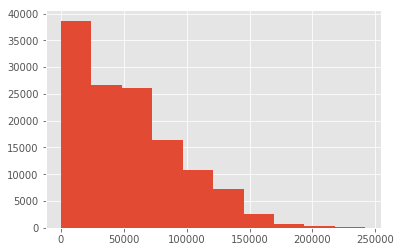

In [29]:
all_years_data_drop_outliers.salary.hist()

# 4 Analyze and Visualize 

## Question 1
**1**.Which languages were most popular in each year?

In [30]:
from pyecharts import Timeline

data_analyze = deepcopy(all_years_data_drop_outliers)

possible_vals = ['JavaScript','SQL','Java','C#','Python','PHP','CSS','HTML','C++','C','Bash/Shell','Ruby','TypeScript','Objective-C',
 'Server','Node.js','Swift','AngularJS','Visual','Basic','Go','R','Matlab',]

def total_count(df, col1, col2, look_for=None):
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    col1: the column name you want to look through
    col2: the column you want to count values from
    look_for: a list of strings you want to search for in each row of df[col];
    
    Returns:
    ------------------------
    new_df: a dataframe of each look_for with the count of how often it shows up
    '''
    
    from collections import defaultdict
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

def clean_and_plot(df, title, feature, possible_vals, plot=True):
    '''
    Parameters:
    ----------------------
    df: a dataframe holding the languages column
    title: string the title of your plot
    plot: bool providing whether or not you want a plot back
    feature: feature needs to be handled 
        
    Returns:
    --------------------
    study_df: a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    
    import matplotlib.pyplot as plt
    
    study = df[feature].value_counts().reset_index()
    study.rename(columns={'index': feature, feature: 'count'}, inplace=True)
    study_df = total_count(study, feature, 'count', possible_vals)

    study_df.set_index(feature, inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
rank_years = {}
language_counts_df = {}

q1_data=None
for year in range(2011,2019):
    cur_data = data_analyze[data_analyze.year == year]
    cur_language_counts_df = clean_and_plot(cur_data,title = "Popular languages in %d" %year, feature='languages', 
                                            possible_vals=possible_vals,plot=False)
    
    # reserve top 10 languages
    cur_language_counts_df = cur_language_counts_df.head(10)
    cur_language_counts_df.loc['Other',:] = 1 - cur_language_counts_df.sum().sum()
    cur_language_counts_df.rename(columns={'count':year},inplace=True)
    
    if year==2011:
        q1_data = cur_language_counts_df
    else:
        q1_data = pd.merge(q1_data,cur_language_counts_df,how='outer',left_index=True,right_index=True)
    

q1_data['average'] = q1_data[[2011,2012,2013,2014,2015,2016,2017,2018]].sum(axis=1)/8
q1_data.sort_values(by=['average'],inplace=True,ascending=False)
del q1_data['average']

q1_chart = render_echarts(q1_data.T,chart_title="The top popular languages in each year",
              chart_kind='line',
                          legend_pos='88%',legend_orient='vertical',legend_top='center',
                          is_toolbox_show=False,
                          is_label_show=True,label_formatter='{a}',height=800)

q1_chart

**Answer to question 1**:  
C is the most popular language among participants in 2011,2012.In the next 5 years, the number of people participating in the survey who use Java exceeded C, Java became the most popular language.But in 2018, C is the most popular language again among participants .

## Question 2
**2**.Which occupations were most popular in each year?

In [31]:
possible_vals = ['full stack web developer',
 'back end developer',
 'full stack developer',
 'front end developer',
 'back end web developer',
 'student',
 'desktop or enterprise applications developer',
 'mobile developer',
 'database administrator',
 'system administrator',
 'front end web developer',
 'devops specialist',
 'designer',
 'desktop developer',
 'mobile dev (android, ios, wp & multi-platform)',
 'data or business analyst',
 'qa or test developer',
 'web application developer',
 'data scientist or machine learning specialist',
 'data scientist',
 'full stack web developer',
 'engineering manager',
 'embedded application developer',
 'product manager',
 'embedded applications or devices developer',
 'mathematics developers (data scientists, machine learning devs & devs with stats & math backgrounds)']

rank_years = {}
occupation_counts_df = {}
    
q2_data=None
for year in range(2011,2019):
    cur_data = data_analyze[data_analyze.year == year]
    cur_occupation_counts_df = clean_and_plot(cur_data,title = "Popular languages in %d" %year, feature='occupation', 
                                            possible_vals=possible_vals,plot=False)
    
    # reserve top 5 occupations
    cur_occupation_counts_df = cur_occupation_counts_df.head(5)
    cur_occupation_counts_df.loc['Other',:] = 1 - cur_occupation_counts_df.sum().sum()
    cur_occupation_counts_df.rename(columns={'count':year},inplace=True)
    
    if year==2011:
        q2_data = cur_occupation_counts_df
    else:
        q2_data = pd.merge(q2_data,cur_occupation_counts_df,how='outer',left_index=True,right_index=True)
    

q2_data['average'] = q1_data[[2011,2012,2013,2014,2015,2016,2017,2018]].sum(axis=1)/8
q2_data.sort_values(by=['average'],inplace=True,ascending=False)
del q2_data['average']

q2_chart = render_echarts(q2_data.T,chart_title="The top popular occupations in each year",
              chart_kind='line',
                          legend_pos='15%',legend_orient='vertical',legend_top='30%',legend_text_size=9,
                          is_toolbox_show=False,
                          is_label_show=True,label_formatter='{a}',height=800)

q2_chart

**Answer to question 2**:  
- Web application developer is the most popular occupation among participants before 2012.
- Full-stack web developer is the most popular occupation among participants between 2013 and 2017.
- back-end developer is the most popular occupation among participants after 2018.

## Question 3
**3**.What is the average IT experience of programmers in different countries each year?

First,I just want to see the top 10 countries with the largest number of the participants who take part in these surveys.

In [32]:
# see the top 10 countries with the largest number of the participants who take part in these surveys
top_10_countries = list(data_analyze.groupby('country').count() \
    .sort_values(by='index',ascending=False).head(10).index)

print("Top 10 counties are %s" %",".join(top_10_countries))

#In addition, I also want to see the infomation of China's participants
top_10_countries.append('China')
top_10_countries_and_China = top_10_countries

Top 10 counties are United States of America,United Kingdom,Germany,India,Canada,France,Poland,Australia,Russian Federation,Netherlands


In [33]:
def average_information_in_interest_countries_each_year(df, feature,countries):
    '''get average information in interest countries each year
    
    Parameters:
    ---------------------
    df:pd.DataFrame
        df which needs to be counted
    feature:string
        feature which needs to be counted
    countries:list
        country list in which I am interested 
        
    Returns:
    -----------------------
    pd.DataFrame:df contains average information
    '''
    df = df.dropna(subset=[feature,'country'])
    df = df[df.country.isin(top_10_countries_and_China)]
    average_df = pd.pivot_table(df,index='year',values=feature,columns='country',aggfunc=np.average,
                                                              margins='row')
    average_df.drop(index=['All'],inplace=True)
    average_df.rename(columns={'All':'Average'},inplace=True)
    average_df.dropna(how='all',inplace=True)

    # round df's values for showing beautiful
    average_df = average_df.applymap(lambda x:round(x,2) if x > 0 else x)
    
    return average_df

average_IT_experience_country_year_table = average_information_in_interest_countries_each_year(data_analyze,'IT_experience',
                                                                                              top_10_countries_and_China)

display(average_IT_experience_country_year_table)
q3_chart = render_echarts(average_IT_experience_country_year_table,chart_title="The average IT_experiences of programmers in different countries each year",
              chart_kind='line',
                          legend_pos='10%',legend_orient='vertical',legend_top='center',
                          is_toolbox_show=False,
                          is_label_show=True,label_formatter='{a}',height=800,
                          yaxis_min=2)
q3_chart 

country,Australia,Canada,China,France,Germany,India,Netherlands,Poland,Russian Federation,United Kingdom,United States of America,Average
year,,,,,,,,,,,,
2011,10.63,9.88,NaN,10.40,11.00,4.86,10.18,NaN,NaN,10.74,10.56,10.38
2012,9.74,9.78,NaN,8.12,9.17,2.88,10.27,NaN,NaN,10.28,10.15,9.35
2013,7.50,7.66,NaN,7.21,8.40,4.61,8.42,NaN,NaN,8.19,8.07,7.75
2014,7.74,7.34,5.85,7.07,7.67,3.81,8.31,6.10,NaN,7.95,7.77,7.13
2015,7.00,6.89,5.43,6.51,6.79,3.29,7.18,5.64,5.73,7.08,7.07,6.38
2016,7.83,7.23,5.22,6.52,7.46,3.57,7.57,5.20,5.73,7.48,7.41,6.78
2017,9.03,7.62,5.34,6.39,7.36,3.87,7.96,4.84,6.84,7.41,8.21,7.32
2018,9.55,8.28,4.28,6.63,7.13,3.31,7.72,5.27,5.62,8.51,8.63,7.67


**Answer to question 3**:  
There are two main features in this graph.  

- Firstly, the average IT work experience of programmers in developed countries is very close,and all of them is more than 6 years.Otherwise,the average IT work experience of programmers in developing countries is at a low level, most of which are below 6 

- In addition, the average ages of programmers in all countries show an decrease during 2011-2015.I guess the reason is there was a large amount of graduates enter in the IT market at that time.

## Question 4
**4**.What is the average age of programmers in different countries each year?

In [34]:
average_age_country_year_table = average_information_in_interest_countries_each_year(data_analyze,'age',
                                                                                              top_10_countries_and_China)

q4_chart = render_echarts(average_age_country_year_table,chart_title="The average ages of programmers in different countries each year",
              chart_kind='line',
                          legend_pos='0%',legend_orient='vertical',legend_top='center',
                          is_toolbox_show=False,
                          is_label_show=True,label_formatter='{a}',height=800,
                          yaxis_min = 25)
q4_chart 

**Answer to question 4**:  
There are two main features in this graph.  
- Firstly, it’s obvious that the programmers in developing counties are younger than their counterparts in developed countries during the whole period.   
- In addition, the average ages of programmers in all countries show an increase during 2016-2018.

## Question 5
**5**.What is the average salary of the participants in different countries each year?

In [35]:
average_salary_country_year_table = average_information_in_interest_countries_each_year(data_analyze,'salary',top_10_countries_and_China)

# round data for showing beautiful
average_salary_country_year_table = average_salary_country_year_table.applymap(lambda x:round(x,2) if x > 0 else x)
q5_chart = render_echarts(average_salary_country_year_table,chart_title="The average salaries of programmers in different countries each year",
              chart_kind='line',
                          legend_pos='0%',legend_orient='vertical',legend_top='15%',
                          is_toolbox_show=False,
                          is_label_show=True,label_formatter='{a}',height=800,
                          yaxis_min = 10000)
q5_chart 

**Answer to question 5**:  
- It’s obvious that the programmers in developing counties earn less salary than their counterparts in developed countries during the whole period. The top three countries where programmers make the most salary are the United States,Australia,Canada.
- Over the four years after 2011, the average salary of programmers dropped by around 22%.It rose by 17% between 2015 and 2018.


## Question 6
**6**.What is the average salary of the participants in different countries each year?

In [36]:
average_age_country_year_table = average_information_in_interest_countries_each_year(data_analyze,'company_size',
                                                                                              top_10_countries_and_China)

q6_chart = render_echarts(average_age_country_year_table,chart_title="The average size of companies in different countries each year",
              chart_kind='line',
                          legend_pos='20%',legend_orient='vertical',legend_top='20%',
                          is_toolbox_show=False,
                          is_label_show=True,label_formatter='{a}',height=800,
                          yaxis_min = 25)
q6_chart 

**Answer to question 6**:  
- It’s obvious that the average size of companies had large increase in different countries during 2011 and 2017 and it rose by 2% between 2017 and 2018.


# 5 Model 
Create a model to predict the salary of a programmer if I have his some features. 

## 5.1 Drop missing or impute before modeling

In [37]:
data_drop_missing_value = deepcopy(data_analyze)
del data_drop_missing_value['index']
# see the numbers of missing value in each column
data_drop_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129582 entries, 4 to 249914
Data columns (total 9 columns):
IT_experience    125017 non-null float64
age              113888 non-null float64
company_size     62670 non-null float64
country          129265 non-null object
industry         63394 non-null object
languages        127147 non-null object
occupation       129582 non-null object
salary           129582 non-null float64
year             129582 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 9.9+ MB


- columns 'age','salary','industry','company_size' have large proportion of missing values.I should drop them after consideration.  
- Other columns can be simply dropna.
  
  
**Drop the row if it has null value in columns 'country','IT_experience','languages ','occupation'**

In [38]:
data_drop_missing_value = data_drop_missing_value.dropna(subset=['country','IT_experience','languages','occupation'],how='any')
print(f'After dropped missing value in "country","IT_experience","languages","occupation", data has {data_drop_missing_value.shape[0]} samples {data_drop_missing_value.shape[1]} columns')

After dropped missing value in "country","IT_experience","languages","occupation", data has 122383 samples 9 columns


**Missing Value in column 'Industry'**
- Because it has large proportion of missing value.If I simply drop missing value in column 'Industry',it will loss lots of samples.
- So I decide to divide the df into two groups.One has missing value and the other hasn't.

In [39]:
data_drop_missing_value['industry_is_na'] = pd.isna(data_drop_missing_value.industry)

In [40]:
display(pd.pivot_table(data_drop_missing_value.dropna(subset=['age','IT_experience','company_size']),columns='industry_is_na',
               values=['salary','age','IT_experience',"company_size"],aggfunc=np.average,dropna=True))

del data_drop_missing_value['industry_is_na']

industry_is_na,False,True
IT_experience,8.247677,7.276987
age,32.637874,31.103484
company_size,645.958052,2103.861259
salary,70296.626353,58732.370746


There are large differences between the two groups above.It’s not wise to remove missing data directly.So I decide to use 'missing' to replace missing value.

In [41]:
data_drop_missing_value.loc[:,'industry'] = data_drop_missing_value['industry'].map(lambda x: "missing" if pd.isna(x) else x)

**Missing Value in column 'size of company'**


In [42]:
# calculate the proportion of missing value in 'company_size' column
pro_company_size = data_drop_missing_value.company_size.isnull().mean()
print('"company_size" column has %d%% missing values' %(pro_company_size*100))

"company_size" column has 53% missing values


It has a large proportion missing values,so I decided to drop this column.

In [43]:
del data_drop_missing_value['company_size']

## 5.2 Create A Model

In [44]:
from sklearn.cross_validation import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler,normalize
# from sklearn.pipeline import Pipeline

is_use_PCA = True

model_df = data_drop_missing_value[['country','IT_experience', 'age', 'industry','year','salary']]

# Fill numeric columns with the mean
num_vars = model_df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    model_df[col].fillna((model_df[col].mean()), inplace=True)

# Dummy the categorical variables
cat_vars = model_df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    model_df = pd.concat([model_df.drop(var, axis=1), pd.get_dummies(model_df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
#Split into explanatory and response variables
X = model_df.drop(columns=['salary'])
y = model_df['salary'].astype(int)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42) 


gbdt=GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1, 
                               min_samples_split=2, min_samples_leaf=1, max_depth=3, init=None, 
                               random_state=None, max_features=None, alpha=0.9, verbose=0, 
                               max_leaf_nodes=None, warm_start=False)
gbdt.fit(X_train,y_train)
# dtr_model = DecisionTreeRegressor(min_samples_leaf=10) # Instantiate
# dtr_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = gbdt.predict(X_test) 
print("The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._u

The r-squared score for the model was 0.5242110451609185 on 24477 values.


Let's predict the salary of a programmer who is 25 years old,has 3 years experience,engage in Gaming at China.


In [45]:
sample_predict = pd.DataFrame({'IT_experience':3,'age':25, 'year':2018,'industry_Gaming':1,'country_China':1},index=[0])

for column_name in X.columns:
    if column_name not in sample_predict.columns:
        sample_predict[column_name] = 0
        
predict_salary = gbdt.predict(sample_predict)[0]
print("The model predict the salary of this programmer is %.2f" % predict_salary)


The model predict the salary of this programmer is 25944.67
